## Python Libraries - Pandas - Pandas Basics

Pandas is a library built using NumPy specifically for data analysis. You'll be using Pandas heavily for data manipulation, visualisation, building machine learning models, etc. 

There are two main data structures in Pandas:
- Series
- Dataframes 

The default way to store data is dataframes, and thus manipulating dataframes quickly is probably the most important skill set for data analysis.

In [1]:
# import pandas, pd is an alias
import pandas as pd

### The Pandas Series 

A series is similar to a 1-D numpy array, and contains scalar values of the same type (numeric, character, datetime etc.). 
A dataframe is simply a table where each column is a pandas series.


In [2]:
# Creating a numeric pandas series
s = pd.Series([2, 4, 5, 6, 9])
print(s)
print(type(s))

0    2
1    4
2    5
3    6
4    9
dtype: int64
<class 'pandas.core.series.Series'>


In [5]:
# creating a series of type datetime
date_series = pd.date_range(start = '11-09-2017', end = '12-12-2017')
date_series
# type(date_series)

DatetimeIndex(['2017-11-09', '2017-11-10', '2017-11-11', '2017-11-12',
               '2017-11-13', '2017-11-14', '2017-11-15', '2017-11-16',
               '2017-11-17', '2017-11-18', '2017-11-19', '2017-11-20',
               '2017-11-21', '2017-11-22', '2017-11-23', '2017-11-24',
               '2017-11-25', '2017-11-26', '2017-11-27', '2017-11-28',
               '2017-11-29', '2017-11-30', '2017-12-01', '2017-12-02',
               '2017-12-03', '2017-12-04', '2017-12-05', '2017-12-06',
               '2017-12-07', '2017-12-08', '2017-12-09', '2017-12-10',
               '2017-12-11', '2017-12-12'],
              dtype='datetime64[ns]', freq='D')

Note that each element in the Series has an index, and the index starts at 0 as usual.

### The Pandas Dataframe 

Dataframe is the most widely used data-structure in data analysis. It is a table with rows and columns, with rows having an index and columns having meaningful names.

There are various ways of creating dataframes, such as creating them from dictionaries, JSON objects, reading from txt, CSV files, etc. 

#### Creating dataframes from dictionaries

In [7]:
# Defining data to create lists for dictionary
cars_per_cap = [809, 731, 588, 18, 200, 70, 45]
country = ['United States', 'Australia', 'Japan', 'India', 'Russia', 'Morocco', 'Egypt']
drives_right = [False, True, True, True, False, False, False]

In [8]:
# Creating the dictionaries to store the entries as key-value pair.
cars_dict = {"cars_per_cap" : cars_per_cap, "country" : country, "drives_right" : drives_right }

# Create the dataframe 'cars'
cars = pd.DataFrame(cars_dict)

In [9]:
# print the created dataframe
cars

,cars_per_cap,country,drives_right
0,809,United States,False
1,731,Australia,True
2,588,Japan,True
3,18,India,True
4,200,Russia,False
5,70,Morocco,False
6,45,Egypt,False


#### Importing CSV data files as pandas dataframes (And removing headers)

For the upcoming exercises, we will use a car dataset which holds the following information:

- Region Code 
- Country
- Coutry Code
- Car per capita
- Drives Right

In [10]:
# read the data from the csv file
cars =pd.read_csv("cars.csv")

# check the dataframe created
cars

,USCA,US,United States,809,FALSE
0,ASPAC,AUS,Australia,731.0,True
1,ASPAC,JAP,Japan,588.0,True
2,ASPAC,IN,India,18.0,True
3,ASPAC,RU,Russia,200.0,False
4,LATAM,MOR,Morocco,70.0,False
5,AFR,EG,Egypt,45.0,False
6,EUR,ENG,England,NaN,True


As you can see from the dataframe above, the first row has been taken as the column header for the dataframe. Let's see how to prevent that.

In [11]:
# load the dataframe from the csv without any header
cars = pd.read_csv("cars.csv",header=None)

# check the dataframe created
cars

,0,1,2,3,4
0,USCA,US,United States,809.0,False
1,ASPAC,AUS,Australia,731.0,True
2,ASPAC,JAP,Japan,588.0,True
3,ASPAC,IN,India,18.0,True
4,ASPAC,RU,Russia,200.0,False
5,LATAM,MOR,Morocco,70.0,False
6,AFR,EG,Egypt,45.0,False
7,EUR,ENG,England,NaN,True


Now, the columns have the labels as 0, 1, 2, etc. The top row is now considered as a part of the row entries.

## Python Libraries - Pandas - Rows and Columns

### Indices and Labels

#### Indices 

An important concept in pandas dataframes is that of *row indices*. By default, each row is assigned indices starting from 0, and are represented at the left side of the dataframe. 

Now, arbitrary numeric indices are difficult to read and work with. Thus, you may want to change the indices of the dataframe to something more meanigful.

Let's change the index to the second column which stores the country codes, so that you can select rows using the country code directly.

In [22]:
# load the data into a dataframe with no header and index column as the second column
cars = pd.read_csv("cars.csv",header=None,index_col=1)
# Check the created dataframe
cars

,0,2,3,4
1,,,,
US,USCA,United States,809.0,False
AUS,ASPAC,Australia,731.0,True
JAP,ASPAC,Japan,588.0,True
IN,ASPAC,India,18.0,True
RU,ASPAC,Russia,200.0,False
MOR,LATAM,Morocco,70.0,False
EG,AFR,Egypt,45.0,False
ENG,EUR,England,NaN,True


In [23]:
# Print the label of the index column
cars.index

Index(['US', 'AUS', 'JAP', 'IN', 'RU', 'MOR', 'EG', 'ENG'], dtype='object', name=1)

In [16]:
# Remove the label of the index column
del cars.index.name

In [17]:
# Check the created dataframe
cars

,0,2,3,4
US,USCA,United States,809.0,False
AUS,ASPAC,Australia,731.0,True
JAP,ASPAC,Japan,588.0,True
IN,ASPAC,India,18.0,True
RU,ASPAC,Russia,200.0,False
MOR,LATAM,Morocco,70.0,False
EG,AFR,Egypt,45.0,False
ENG,EUR,England,NaN,True


Having meaningful row labels as indices helps you to select (subset) dataframes easily. You will study selecting dataframes in the next section. Let's now try to change the column headers.

#### Column headers

In [20]:
# Print the column headers and row headers of the dataframe
cars.columns

Index(['US', 'AUS', 'JAP', 'IN', 'RU', 'MOR', 'EG', 'ENG'], dtype='object')

In [19]:
# Change the label of each column

cars.columns=["Code","Country","Cars per capita","Drives in"]
# Check the created dataframe
cars

,Code,Country,Cars per capita,Drives in
US,USCA,United States,809.0,False
AUS,ASPAC,Australia,731.0,True
JAP,ASPAC,Japan,588.0,True
IN,ASPAC,India,18.0,True
RU,ASPAC,Russia,200.0,False
MOR,LATAM,Morocco,70.0,False
EG,AFR,Egypt,45.0,False
ENG,EUR,England,NaN,True


Without the labels, it will be very difficult to remember the information stored in the columns. Now you can easily make sense from the entries stored in the dataframe. Let's now try to define multiple indices in a dataframe.

#### Multi-indexing in Pandas

In [24]:
# Import the data from a csv file with multiple indices
cars = pd.read_csv("cars.csv",header=None,index_col=[0,1])

# Check the created dataframe
cars

2      3      4
0     1                               
USCA  US   United States  809.0  False
ASPAC AUS      Australia  731.0   True
      JAP          Japan  588.0   True
      IN           India   18.0   True
      RU          Russia  200.0  False
LATAM MOR        Morocco   70.0  False
AFR   EG           Egypt   45.0  False
EUR   ENG        England    NaN   True

In [25]:
# Change the column names as above
cars.columns=["Country","Cars per capita","Drives in"]

# Check the created dataframe
cars

Country  Cars per capita  Drives in
0     1                                             
USCA  US   United States            809.0      False
ASPAC AUS      Australia            731.0       True
      JAP          Japan            588.0       True
      IN           India             18.0       True
      RU          Russia            200.0      False
LATAM MOR        Morocco             70.0      False
AFR   EG           Egypt             45.0      False
EUR   ENG        England              NaN       True

In [26]:
# Print the index labels
cars.index

MultiIndex(levels=[['AFR', 'ASPAC', 'EUR', 'LATAM', 'USCA'], ['AUS', 'EG', 'ENG', 'IN', 'JAP', 'MOR', 'RU', 'US']],
           labels=[[4, 1, 1, 1, 1, 3, 0, 2], [7, 0, 4, 3, 6, 5, 1, 2]],
           names=[0, 1])

In [27]:
# Change the index labels: 0 - Region_code, 1 - Country_code
cars.index.names=["Region Code","Country Code"]

# Check the created dataframe
cars

Country  Cars per capita  Drives in
Region Code Country Code                                           
USCA        US            United States            809.0      False
ASPAC       AUS               Australia            731.0       True
            JAP                   Japan            588.0       True
            IN                    India             18.0       True
            RU                   Russia            200.0      False
LATAM       MOR                 Morocco             70.0      False
AFR         EG                    Egypt             45.0      False
EUR         ENG                 England              NaN       True

Multi-indexing is very useful to establish a hierarchy in the entries. It helps to segregate data into different categories and makes it easier to analyse the data.

## Python Libraries - Pandas - Describing Data

In [152]:
sales=pd.read_excel("sales.xlsx",index_col=1)
sales.head()

,Market,No_of_Orders,Profit,Sales
Region,,,,
Western Africa,Africa,251,-12901.51,78476.06
Southern Africa,Africa,85,11768.58,51319.50
North Africa,Africa,182,21643.08,86698.89
Eastern Africa,Africa,110,8013.04,44182.60
Central Africa,Africa,103,15606.30,61689.99


In [32]:
sales.tail()

,Market,No_of_Orders,Profit,Sales
Region,,,,
Western US,USCA,490,44303.65,251991.83
Southern US,USCA,255,19991.83,148771.91
Eastern US,USCA,443,47462.04,264973.98
Central US,USCA,356,33697.43,170416.31
Canada,USCA,49,7246.62,26298.81


In [33]:
sales.describe()

,No_of_Orders,Profit,Sales
count,23.000000,23.000000,23.000000
mean,366.478261,28859.944783,206285.108696
std,246.590361,27701.193773,160589.886606
min,37.000000,-16766.900000,8190.740000
25%,211.500000,12073.085000,82587.475000
50%,356.000000,20948.840000,170416.310000
75%,479.500000,45882.845000,290182.375000
max,964.000000,82091.270000,656637.140000


In [34]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, Western Africa to Canada
Data columns (total 4 columns):
Market          23 non-null object
No_of_Orders    23 non-null int64
Profit          23 non-null float64
Sales           23 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 920.0+ bytes


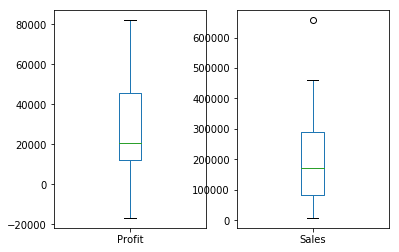

In [41]:
### plotting the box plot for sales and profit columns(to find the outliers)
import matplotlib.pyplot as plt
sales[['Profit','Sales']].plot(kind="box",subplots=True)
plt.show()

# PANDAS(INDEXING AND SLICING)

In [42]:
sales.head()


,Market,No_of_Orders,Profit,Sales
Region,,,,
Western Africa,Africa,251,-12901.51,78476.06
Southern Africa,Africa,85,11768.58,51319.50
North Africa,Africa,182,21643.08,86698.89
Eastern Africa,Africa,110,8013.04,44182.60
Central Africa,Africa,103,15606.30,61689.99


### Difference between [[]] and []

In [48]:
sales[["Profit","Sales"]].head()
type(sales[["Profit"]])       ## type is a dataframe

pandas.core.frame.DataFrame

In [53]:
sales["Profit"]
type(sales)

pandas.core.frame.DataFrame

In [49]:
type(sales["Profit"])     ## type is a series

pandas.core.series.Series

### SLICING A ROW(dataframe.loc[[list_of_row_labels], [list_of_column_labels]])

In [56]:
sales.loc["Western Africa"]   ##panda returns a series

Market           Africa
No_of_Orders        251
Profit         -12901.5
Sales           78476.1
Name: Western Africa, dtype: object

In [57]:
sales.loc[["Western Africa","Canada"]]  ## panda returns a dataframe

,Market,No_of_Orders,Profit,Sales
Region,,,,
Western Africa,Africa,251,-12901.51,78476.06
Canada,USCA,49,7246.62,26298.81


In [58]:
sales.loc[["Western Africa","Canada"],["Profit","Sales"]]  ## slicing a paricular row and column

,Profit,Sales
Region,,
Western Africa,-12901.51,78476.06
Canada,7246.62,26298.81


In [62]:
sales.count()

Market          23
No_of_Orders    23
Profit          23
Sales           23
dtype: int64

In [74]:
## printing even rows
sales[0:-1:2]

,Market,No_of_Orders,Profit,Sales
Region,,,,
Western Africa,Africa,251,-12901.51,78476.06
North Africa,Africa,182,21643.08,86698.89
Central Africa,Africa,103,15606.30,61689.99
Southern Asia,Asia Pacific,469,67998.76,351806.60
Oceania,Asia Pacific,646,54734.02,408002.98
Central Asia,Asia Pacific,37,-2649.76,8190.74
Southern Europe,Europe,338,18911.49,215703.93
Eastern Europe,Europe,241,25050.69,108258.93
Central America,LATAM,930,74679.54,461670.28


### Slicing on the basis of index

In [75]:
sales.iloc[0:5,2:]

,Profit,Sales
Region,,
Western Africa,-12901.51,78476.06
Southern Africa,11768.58,51319.50
North Africa,21643.08,86698.89
Eastern Africa,8013.04,44182.60
Central Africa,15606.30,61689.99


In [86]:
sales.iloc[[2]]

,Market,No_of_Orders,Profit,Sales
Region,,,,
North Africa,Africa,182,21643.08,86698.89


In [88]:
sales.loc[["North Africa"],["Profit"]]

,Profit
Region,
North Africa,21643.08


## Conditional Subsetting

In [91]:
## we need to find all the positive sales data for profit
sales["Profit"]>0
sales[sales["Profit"]>0].head()

,Market,No_of_Orders,Profit,Sales
Region,,,,
Southern Africa,Africa,85,11768.58,51319.50
North Africa,Africa,182,21643.08,86698.89
Eastern Africa,Africa,110,8013.04,44182.60
Central Africa,Africa,103,15606.30,61689.99
Southern Asia,Asia Pacific,469,67998.76,351806.60


In [102]:
#filter on these cond-1.sales should be greater>250000 2.market should be Europe and LATAM

sales[(sales["Sales"]>250000) and (sales["Market"]=="Europe")]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [103]:
#The reason for the above error is, in python the 'and' operator can deal with the single instance of Boolean values and not multiple instances. 
#The df['D']<0 results in multiple instances of Boolean value, as shown below,

In [104]:
sales[(sales["Sales"]>250000) & (sales["Market"]=="Europe")]

,Market,No_of_Orders,Profit,Sales
Region,,,,
Western Europe,Europe,964,82091.27,656637.14
Northern Europe,Europe,367,43237.44,252969.09


In [120]:
sales[(sales["Sales"]>250000) & ((sales["Market"]=="Europe") | (sales["Market"]=="LATAM"))]   ### Brackets are important to evaluate conditional operators

,Market,No_of_Orders,Profit,Sales
Region,,,,
Western Europe,Europe,964,82091.27,656637.14
Northern Europe,Europe,367,43237.44,252969.09
Central America,LATAM,930,74679.54,461670.28


In [122]:
sales[(sales["Sales"]>250000) & (sales["Market"].isin(["Europe","LATAM"]))]   ## using the isin operator

,Market,No_of_Orders,Profit,Sales
Region,,,,
Western Europe,Europe,964,82091.27,656637.14
Northern Europe,Europe,367,43237.44,252969.09
Central America,LATAM,930,74679.54,461670.28


## Operations in Pandas(making the data more useful)

In [133]:
## creating a new column sales data in thousand in which sales data is divided by 1000
sales["Sales data in thousand"]=sales["Sales"]/1000
## dropping the other 2 columns
sales=sales.drop(["Sales","sales data in thousand"],axis=1)
sales.head()

,Market,No_of_Orders,Profit,Sales data in thousand
Region,,,,
Western Africa,Africa,251,-12901.51,78.47606
Southern Africa,Africa,85,11768.58,51.31950
North Africa,Africa,182,21643.08,86.69889
Eastern Africa,Africa,110,8013.04,44.18260
Central Africa,Africa,103,15606.30,61.68999


### Applying lambda function

In [151]:
sales["Profitable"]=(sales["Profit"]>10000).apply(lambda x : "Yes" if x==True else "No")
sales.head()

,level_0,index,Region,Market,No_of_Orders,Profit,Sales data in thousand,Profitable
0,0,0,Western Africa,Africa,251,-12901.51,78.47606,No
1,1,1,Southern Africa,Africa,85,11768.58,51.31950,Yes
2,2,2,North Africa,Africa,182,21643.08,86.69889,Yes
3,3,3,Eastern Africa,Africa,110,8013.04,44.18260,No
4,4,4,Central Africa,Africa,103,15606.30,61.68999,Yes


## Hierarchial Indexing

### 1.Resetting the columns and assigning the new one

In [154]:
sales.reset_index(inplace=True)
sales.set_index(["Market","Region"],inplace=True)
sales

index  No_of_Orders    Profit      Sales
Market       Region                                                     
Africa       Western Africa         0           251 -12901.51   78476.06
             Southern Africa        1            85  11768.58   51319.50
             North Africa           2           182  21643.08   86698.89
             Eastern Africa         3           110   8013.04   44182.60
             Central Africa         4           103  15606.30   61689.99
Asia Pacific Western Asia           5           382 -16766.90  124312.24
             Southern Asia          6           469  67998.76  351806.60
             Southeastern Asia      7           533  20948.84  329751.38
             Oceania                8           646  54734.02  408002.98
             Eastern Asia           9           414  72805.10  315390.77
             Central Asia          10            37  -2649.76    8190.74
Europe       Western Europe        11           964  82091.27  656637.14
             Southern Europe       12           338  18911.49  215703.93
             Northern Europe       13           367  43237.44  252969.09
             Eastern Europe        14           241  25050.69  108258.93
LATAM        South America         15           496  12377.59  210710.49
             Central America       16           930  74679.54  461670.28
             Caribbean             17           288  13529.59  116333.05
USCA         Western US            18           490  44303.65  251991.83
             Southern US           19           255  19991.83  148771.91
             Eastern US            20           443  47462.04  264973.98
             Central US            21           356  33697.43  170416.31
             Canada                22            49   7246.62   26298.81

### 2. Fetching the rows and columns of the new hierarchial data

In [156]:
sales.loc["Africa"]

,index,No_of_Orders,Profit,Sales
Region,,,,
Western Africa,0,251,-12901.51,78476.06
Southern Africa,1,85,11768.58,51319.50
North Africa,2,182,21643.08,86698.89
Eastern Africa,3,110,8013.04,44182.60
Central Africa,4,103,15606.30,61689.99


In [159]:
sales.loc[[("Africa","Western Africa")]]

,,index,No_of_Orders,Profit,Sales
Market,Region,,,,
Africa,Western Africa,0,251,-12901.51,78476.06


In [160]:
sales.iloc[0:2,:]

index  No_of_Orders    Profit     Sales
Market Region                                                  
Africa Western Africa       0           251 -12901.51  78476.06
       Southern Africa      1            85  11768.58  51319.50

In [162]:
-3%100

97

In [164]:
-103%100

97

# Python Libraries - Pandas - Grouping and Pivoting

Grouping and aggregation are some of the most frequently used operations in data analysis, especially while performing exploratory data analysis (EDA), where comparing summary statistics across groups of data is common.

Grouping analysis can be thought of as having three parts, namely:
-  Splitting the data into groups (e.g., groups of customer segments, product categories, etc.)
-  Applying a function to each group (e.g., the mean or total sales of each customer segment)
-  Combining the results into a data structure showing summary statistics

## GROUPBY--->

In [180]:
sales.groupby('Market').sum()

,index,No_of_Orders,Profit,Sales
Market,,,,
Africa,10,731,44129.49,322367.04
Asia Pacific,45,2481,197070.06,1537454.71
Europe,50,1910,169290.89,1233569.09
LATAM,48,1714,100586.72,788713.82
USCA,100,1593,152701.57,862452.84


In [183]:
##now if we want the sum for only no of orders
sales[['No_of_Orders']].groupby('Market').sum()

,No_of_Orders
Market,
Africa,731
Asia Pacific,2481
Europe,1910
LATAM,1714
USCA,1593


In [184]:
## sales per market
sales[['Sales']].groupby('Market').sum()

,Sales
Market,
Africa,322367.04
Asia Pacific,1537454.71
Europe,1233569.09
LATAM,788713.82
USCA,862452.84


In [185]:
## largest no of orders from each market
sales[['No_of_Orders']].groupby('Market').max()

,No_of_Orders
Market,
Africa,251
Asia Pacific,646
Europe,964
LATAM,930
USCA,490


In [186]:
## average profit per market
sales[['Profit']].groupby('Market').mean()

,Profit
Market,
Africa,8825.898000
Asia Pacific,32845.010000
Europe,42322.722500
LATAM,33528.906667
USCA,30540.314000


### WHAT HAPPENS WHEN YOU DO GROUPING BY COLUMNS---

In [193]:
sales.groupby(['Profit','Sales']).sum().head()   ## it works fine

,,index,No_of_Orders
Profit,Sales,,
-16766.90,124312.24,5,382
-12901.51,78476.06,0,251
-2649.76,8190.74,10,37
7246.62,26298.81,22,49
8013.04,44182.60,3,110


In [194]:
sales[['No_of_Orders']].groupby(['Profit','Sales']).sum().head()  ##error

KeyError: 'Profit'

In [196]:
### to fix the above error we need to create a new dataframe which contains onl the columns on which we want to groupby and aggrgaate

sales[['No_of_Orders','Profit','Sales']].groupby(['Profit','Sales']).sum().head()

,,No_of_Orders
Profit,Sales,
-16766.90,124312.24,382
-12901.51,78476.06,251
-2649.76,8190.74,37
7246.62,26298.81,49
8013.04,44182.60,110


## PIVOTING(COMMAND=df.pivot(columns='grouping_variable_col', values='value_to_aggregate', index='grouping_variable_row')

You may want to use pandas pivot tables as an alternative to ```groupby()```. They provide Excel-like functionalities to create aggregate tables. 

In [197]:
# Read the help documentation for pivot_table
help(pd.DataFrame.pivot_table)

Help on function pivot_table in module pandas.core.frame:

pivot_table(self, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
    Create a spreadsheet-style pivot table as a DataFrame. The levels in
    the pivot table will be stored in MultiIndex objects (hierarchical
    indexes) on the index and columns of the result DataFrame
    
    Parameters
    ----------
    values : column to aggregate, optional
    index : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The
        list can contain any of the other types (except list).
        Keys to group by on the pivot table index.  If an array is passed,
        it is being used as the same manner as column values.
    columns : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The
        list can contain any of the other types

In [211]:
# Create a new dataframe
users= pd.DataFrame({"weekday" : ['Sun', 'Sun', 'Mon', 'Mon'],
                    "city": ['Austin', 'Dallas', 'Austin', 'Dallas'],
                    "visitors":[139, 237, 326, 456],
                    "signups" : [7, 12, 3, 5]})

In [200]:
users.set_index('weekday',inplace=True)
users

,city,visitors,signups
weekday,,,
Sun,Austin,139,7
Sun,Dallas,237,12
Mon,Austin,326,3
Mon,Dallas,456,5


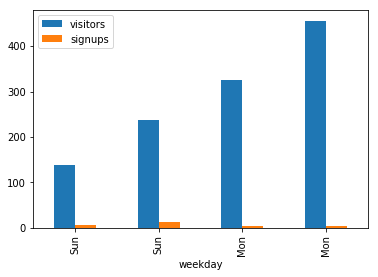

In [201]:
users.plot(kind="bar")
plt.show()

In [216]:
# Create a pivot table with the columns as 'city' summarising the variable 'visitors'
pivot_users=users.pivot(columns=['city','weekday'],values='visitors')
pivot_users

KeyError: 'Level city not found'

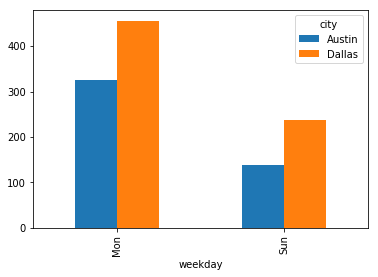

In [205]:
pivot_users.plot(kind="bar")
plt.show()

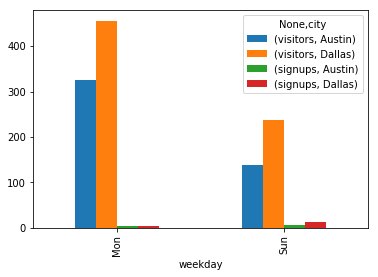

In [206]:
visitors_signups=users.pivot(columns='city')
visitors_signups.plot(kind="bar")
plt.show()

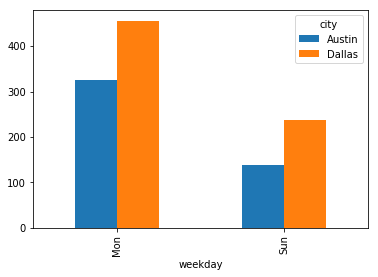

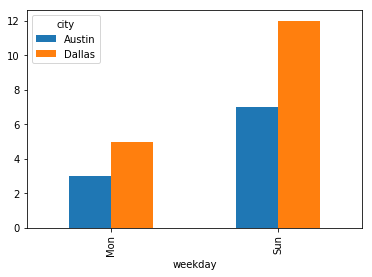

In [210]:
### better way would be to create subplots
visitors_signups["visitors"].plot(kind="bar")
visitors_signups["signups"].plot(kind="bar")
plt.show()

### AGGREGATION USING PIVOTS

- df.pivot_table(values, index, aggfunc={'value_1': np.mean,'value_2': [min, max, np.mean]})
- The function above, when substituted with proper values, will result in a mean value of value_1 and three values (minimum, maximum and a mean of value_2) for each row.

In [218]:
new_pivot_users=users.pivot_table(['visitors','signups'],['weekday','city'])
new_pivot_users

signups  visitors
weekday city                     
Mon     Austin        3       326
        Dallas        5       456
Sun     Austin        7       139
        Dallas       12       237

In [223]:
import numpy as np
new_pivot_users=users.pivot_table(['visitors','signups'],['weekday','city'],aggfunc={'visitors':np.mean,'signups':[min,max]})
new_pivot_users

signups     visitors
                   max min     mean
weekday city                       
Mon     Austin       3   3      326
        Dallas       5   5      456
Sun     Austin       7   7      139
        Dallas      12  12      237

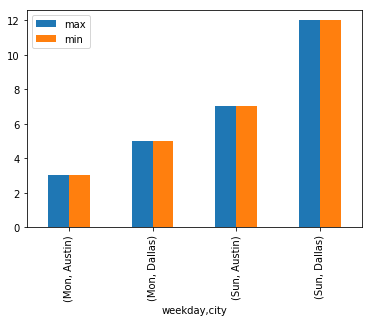

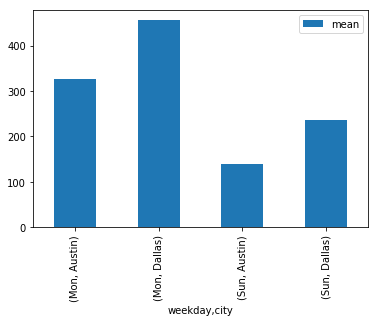

In [225]:
new_pivot_users["signups"].plot(kind="bar")
new_pivot_users["visitors"].plot(kind="bar")
plt.show()

# MERGE AND APPEND

For merging, we have sales data across multiple sheets in an Excel file. We will now work with all these sheets and learn to:
* Merge multiple dataframes using common columns/keys using ```pd.merge()```

Let's first read all the data files.

In [227]:
# read the sheets from file 'sales_returns.xlsx' into 2 different dataframes - orders and returns
orders = pd.read_excel("sales_returns.xlsx",sheet_name='Orders')
returns = pd.read_excel("sales_returns.xlsx",sheet_name='Returns')
orders.head()

,Order ID,Market,Profit,Sales
0,AG-2012-AA6453-41020,Africa,53.76,298.68
1,AG-2012-AC4203-40915,Africa,14.58,91.38
2,AG-2012-AH2103-41133,Africa,11.04,276.96
3,AG-2012-AJ7803-40978,Africa,7.17,35.97
4,AG-2012-AS2853-41235,Africa,15.36,54.90


In [228]:
returns.head()

,Returned,Order ID
0,Yes,CA-2012-SA20830140-41210
1,Yes,IN-2012-PB19210127-41259
2,Yes,CA-2012-SC20095140-41174
3,Yes,IN-2015-JH158207-42140
4,Yes,IN-2014-LC168857-41747


In [229]:
#checking the shape of the datasets
print(orders.shape,returns.shape)

(25728, 4) (1079, 2)


In [231]:
# Create a dataframe 'return_orders' by merging the two dataframes on Order_ID
return_orders=orders.merge(returns,on='Order ID')

# Check the created dataframe
return_orders.head()

,Order ID,Market,Profit,Sales,Returned
0,AG-2013-PO88653-41634,Africa,191.25,1932.24,Yes
1,AG-2014-CM21603-41755,Africa,10.32,43.05,Yes
2,AG-2014-CP20853-41889,Africa,14.10,84.72,Yes
3,AG-2014-RD95853-41712,Africa,21.03,64.38,Yes
4,AO-2013-JE57454-41544,Africa,106.59,499.23,Yes


In [232]:
return_orders.shape

(1079, 5)

In [251]:
# try to use the 'left' method to join two dataframes
return_orders=orders.merge(returns,on='Order ID',how='left')

# Check the created dataframe
return_orders.head()

,Order ID,Market,Profit,Sales,Returned
0,AG-2012-AA6453-41020,Africa,53.76,298.68,NaN
1,AG-2012-AC4203-40915,Africa,14.58,91.38,NaN
2,AG-2012-AH2103-41133,Africa,11.04,276.96,NaN
3,AG-2012-AJ7803-40978,Africa,7.17,35.97,NaN
4,AG-2012-AS2853-41235,Africa,15.36,54.90,NaN


In [252]:
#Converting NAN to string NaN
return_orders['Returned']=return_orders['Returned'].astype('str')
#replacing Nan with "No"
return_orders['Returned']=return_orders['Returned'].apply(lambda x: "No" if x=='nan' else "Yes")

In [255]:
return_orders[return_orders['Returned']=="Yes"].head()

,Order ID,Market,Profit,Sales,Returned
35,AG-2013-PO88653-41634,Africa,191.25,1932.24,Yes
44,AG-2014-CM21603-41755,Africa,10.32,43.05,Yes
45,AG-2014-CP20853-41889,Africa,14.10,84.72,Yes
56,AG-2014-RD95853-41712,Africa,21.03,64.38,Yes
111,AO-2013-JE57454-41544,Africa,106.59,499.23,Yes


The how attribute in the code above specifies the type of merge to be performed:

- left: This will select the entries only in the first dataframe.
- right: This will consider the entries only in the second dataframe.
- outer: This takes the union of all the entries in the dataframes.
- inner: This will result in the intersection of the keys from both frames.

## Append / Concatenate

Concatenation is much more straightforward than merging. It is used when you have dataframes having the same columns and want to append them (pile one on top of the other), or having the same rows and want to append them side-by-side.


**Appending rows in a dataframe**

In [257]:
# Dataframes having the same columns

df1 = pd.DataFrame({'Name': ['Aman', 'Joy', 'Rashmi', 'Saif'],
                    'Age' : ['34', '31', '22', '33'], 
                    'Gender': ['M', 'M', 'F', 'M']}
                  )

df2 = pd.DataFrame({'Name': ['Akhil', 'Asha', 'Preeti'],
                    'Age' : ['31', '22', '23'], 
                    'Gender': ['M', 'F', 'F']}
                  )

In [258]:
# Append the rows of df2 in df1
df1.append(df2)

,Name,Age,Gender
0,Aman,34,M
1,Joy,31,M
2,Rashmi,22,F
3,Saif,33,M
0,Akhil,31,M
1,Asha,22,F
2,Preeti,23,F


**Appending columns in a dataframe**   (pd.concat([dataframe_1, dataframe_2], axis = _ )

In [259]:
# Another dataframe with same number of rows as df1
df3 = pd.DataFrame({'School': ['RK Public', 'JSP', 'Carmel Convent', 'St. Paul'],
                    'Graduation Marks': ['84', '89', '76', '91']}
                  )

In [262]:
# Concatenating the dataframes: df1 and df3(We can't use append here as the column names are not same)
pd.concat([df1,df3])

C:\Users\veins\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Age,Gender,Graduation Marks,Name,School
0,34,M,NaN,Aman,NaN
1,31,M,NaN,Joy,NaN
2,22,F,NaN,Rashmi,NaN
3,33,M,NaN,Saif,NaN
0,NaN,NaN,84,NaN,RK Public
1,NaN,NaN,89,NaN,JSP
2,NaN,NaN,76,NaN,Carmel Convent
3,NaN,NaN,91,NaN,St. Paul


In [263]:
# Concatenating the dataframes across column: df1 and df3
pd.concat([df1,df3],axis=1)

,Name,Age,Gender,School,Graduation Marks
0,Aman,34,M,RK Public,84
1,Joy,31,M,JSP,89
2,Rashmi,22,F,Carmel Convent,76
3,Saif,33,M,St. Paul,91


**DIFFERENCE BETWEEN CONCAT AND MERGE IS THAT CONCAT DOESN'T REQUIRE A UNIQUE COLUMN IN BOTH TABLES TO MERGE THE TABLE WHERAS MERGE IS JOINING THE DATASETS BASED ON UNIQUE COLUMNS**

 When two dataframes have the same row and column labels, you can directly use the mathematical operators provided in the list below:

add(): +
sub(): -
mul(): *
div(): /
floordiv(): //
mod(): %
pow() :**

In [266]:
df1.add(df2)  # concatenation occured

,Name,Age,Gender
0,AmanAkhil,3431,MM
1,JoyAsha,3122,MF
2,RashmiPreeti,2223,FF
3,NaN,NaN,NaN


### IMPORTANT QUESTION

In [292]:
# Defining the three dataframes indicating the gold, silver, and bronze medal counts
# of different countries
gold = pd.DataFrame({'Country': ['USA', 'France', 'Russia'],
                         'Medals': [15, 13, 9]}
                    )
silver = pd.DataFrame({'Country': ['USA', 'Germany', 'Russia'],
                        'Medals': [29, 20, 16]}
                    )
bronze = pd.DataFrame({'Country': ['France', 'USA', 'UK'],
                        'Medals': [40, 28, 27]}
                    )

In [293]:
## determine the total number of medals won by each country? 
total=pd.concat([gold,silver,bronze])
total

,Country,Medals
0,USA,15
1,France,13
2,Russia,9
0,USA,29
1,Germany,20
2,Russia,16
0,France,40
1,USA,28
2,UK,27


In [315]:
#now we will use groupby country to find the total no of medals in each country
total=total[['Medals','Country']].groupby(['Country']).sum()


In [321]:
## sorting the total array in descending order
total=total.sort_values(['Medals'],ascending=False)
total['Medals']=total['Medals'].apply(lambda x: float(x) if type(x)!=float else x)   # converting medals to float values
total

,Medals
Country,
USA,72.0
France,53.0
UK,27.0
Russia,25.0
Germany,20.0


# TIME SERIES ---->